In [1]:
import os

# Path to the folder containing images
image_folder = 'image'

def rename_images_in_folder(folder_path):
    # Get a list of all image files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Sort files to ensure consistent naming order
    files.sort()

    for index, filename in enumerate(files):
        # Get the file extension
        file_extension = os.path.splitext(filename)[1]
        
        # Create the new filename
        new_filename = f"{index}{file_extension}"
        
        # Construct full paths
        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, new_filename)
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed {filename} to {new_filename}")

# Call the function
rename_images_in_folder(image_folder)


Total images: 0


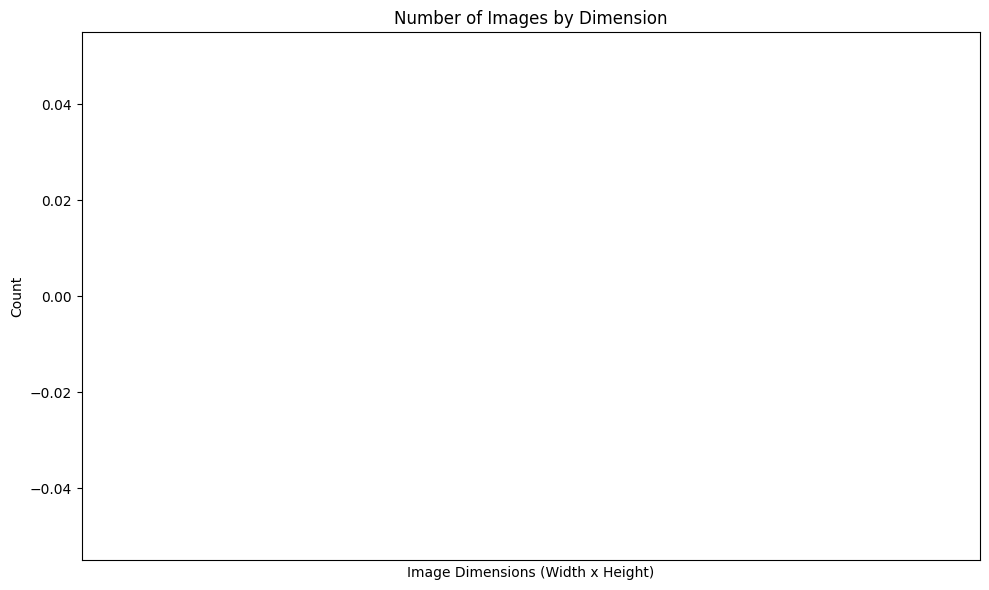

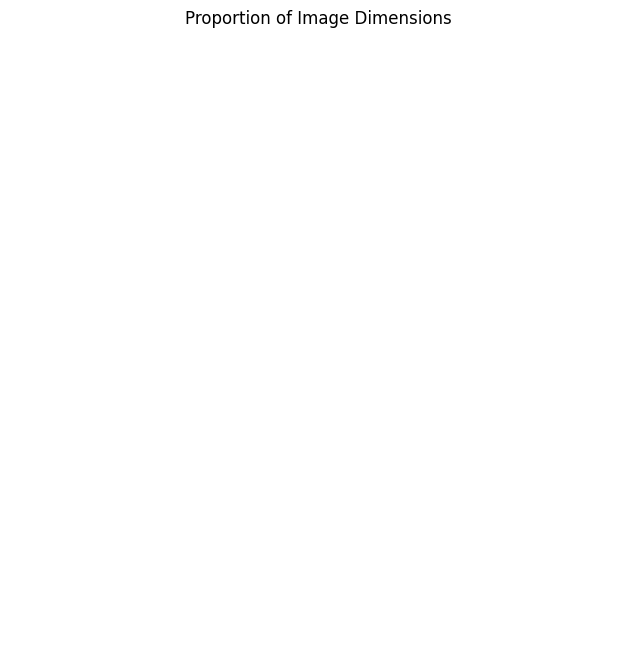

ValueError: need at least one array to concatenate

In [5]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the folder containing images
train_folder = 'C:/Users/CG Lab/Desktop/project/project1/images/train'

# Function to analyze images and generate data
def analyze_images(folder_path):
    image_data = []
    image_sizes = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            try:
                with Image.open(file_path) as img:
                    # Store image data
                    image_sizes.append(img.size)  # (width, height)
                    image_data.append(np.array(img).flatten())  # Flatten pixel data
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return image_data, image_sizes

# Generate and save graphs
def create_graphs(image_data, image_sizes):
    # Total images
    total_images = len(image_sizes)
    print(f"Total images: {total_images}")
    
    # 1. Bar Graph: Number of images by dimension
    size_counts = {}
    for size in image_sizes:
        size_counts[size] = size_counts.get(size, 0) + 1

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(size_counts)), size_counts.values(), tick_label=[str(k) for k in size_counts.keys()])
    plt.xlabel("Image Dimensions (Width x Height)")
    plt.ylabel("Count")
    plt.title("Number of Images by Dimension")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("bar_graph_dimensions.png")
    plt.show()

    # 2. Pie Chart: Proportion of image dimensions
    plt.figure(figsize=(8, 8))
    plt.pie(size_counts.values(), labels=[str(k) for k in size_counts.keys()], autopct='%1.1f%%', startangle=140)
    plt.title("Proportion of Image Dimensions")
    plt.savefig("pie_chart_dimensions.png")
    plt.show()

    # 3. Histogram: Pixel value distribution
    all_pixel_data = np.concatenate(image_data)
    plt.figure(figsize=(10, 6))
    plt.hist(all_pixel_data, bins=50, color='blue', alpha=0.7)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.title("Pixel Value Distribution")
    plt.savefig("histogram_pixel_distribution.png")
    plt.show()

    # 4. Scatter Plot: Image dimensions
    widths = [size[0] for size in image_sizes]
    heights = [size[1] for size in image_sizes]

    plt.figure(figsize=(10, 6))
    plt.scatter(widths, heights, alpha=0.7, c='red', edgecolor='k')
    plt.xlabel("Image Width")
    plt.ylabel("Image Height")
    plt.title("Scatter Plot of Image Dimensions")
    plt.grid(True)
    plt.savefig("scatter_plot_dimensions.png")
    plt.show()

    # 5. Heatmap: Average pixel intensity by position (Optional, for small datasets)
    if total_images > 0:
        avg_image_array = np.mean([np.array(img).reshape(img.size[::-1]) for img in image_data], axis=0)
        plt.figure(figsize=(8, 6))
        sns.heatmap(avg_image_array, cmap="viridis")
        plt.title("Average Pixel Intensity")
        plt.savefig("heatmap_average_pixel_intensity.png")
        plt.show()

# Main execution
image_data, image_sizes = analyze_images(train_folder)
create_graphs(image_data, image_sizes)


Category Counts: {'Angry': 1885, 'Disgust': 1799, 'Fear': 877, 'Happy': 13226, 'Neutral': 6010, 'Sad': 1582, 'Surprise': 1919}


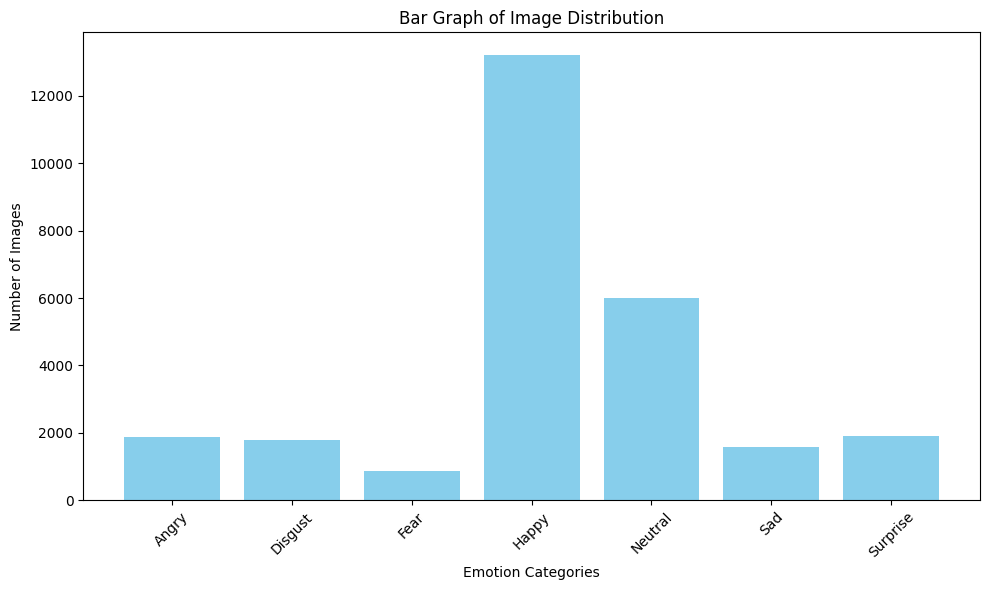

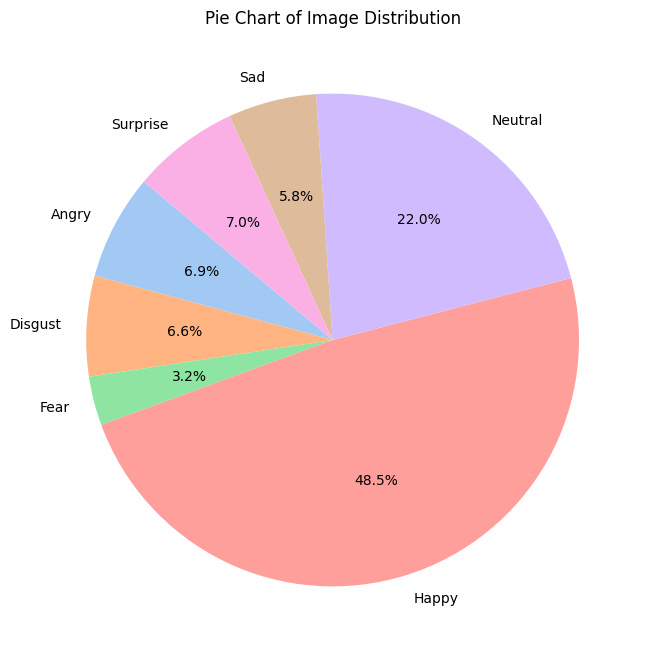

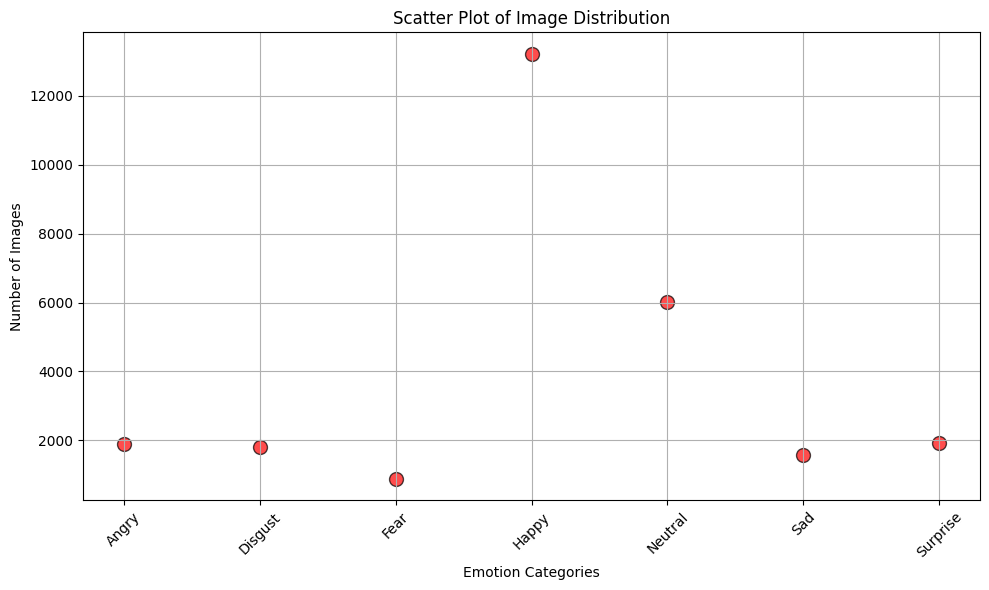

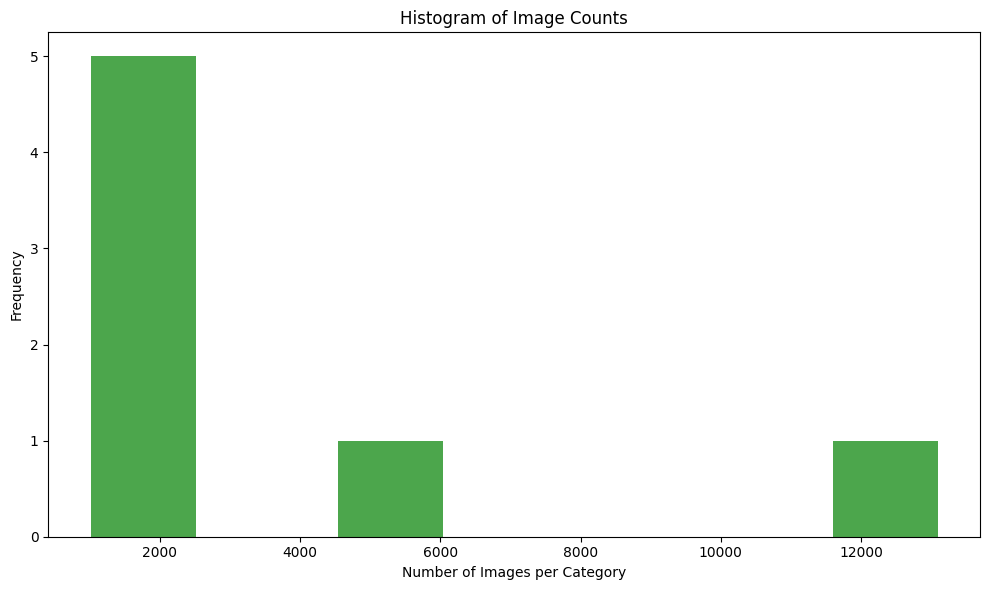

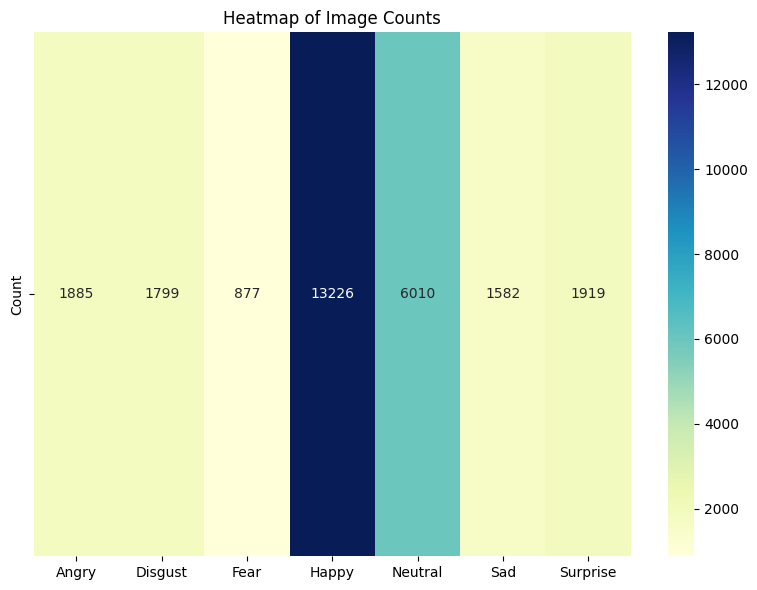

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the train folder
train_folder = "C:/Users/CG Lab/Desktop/project/project1/images/train"

# Function to analyze the folder structure
def analyze_folders(folder_path):
    categories = {}
    subfolders = os.listdir(folder_path)
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            num_images = len([file for file in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, file))])
            categories[subfolder] = num_images
    return categories

# Generate graphs
def create_graphs(category_counts):
    # Data Preparation
    labels = list(category_counts.keys())
    counts = list(category_counts.values())

    # 1. Bar Graph
    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel("Emotion Categories")
    plt.ylabel("Number of Images")
    plt.title("Bar Graph of Image Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("bar_graph.png")
    plt.show()

    # 2. Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title("Pie Chart of Image Distribution")
    plt.savefig("pie_chart.png")
    plt.show()

    # 3. Scatter Plot (Emotion vs Count)
    plt.figure(figsize=(10, 6))
    plt.scatter(labels, counts, color='red', s=100, edgecolor='k', alpha=0.7)
    plt.xlabel("Emotion Categories")
    plt.ylabel("Number of Images")
    plt.title("Scatter Plot of Image Distribution")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("scatter_plot.png")
    plt.show()

    # 4. Histogram (Image Count Distribution)
    plt.figure(figsize=(10, 6))
    plt.hist(counts, bins=len(counts), color='green', alpha=0.7, rwidth=0.85)
    plt.xlabel("Number of Images per Category")
    plt.ylabel("Frequency")
    plt.title("Histogram of Image Counts")
    plt.tight_layout()
    plt.savefig("histogram.png")
    plt.show()

    # 5. Heatmap (if applicable)
    plt.figure(figsize=(8, 6))
    sns.heatmap([counts], annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=["Count"])
    plt.title("Heatmap of Image Counts")
    plt.tight_layout()
    plt.savefig("heatmap.png")
    plt.show()

# Main Execution
category_counts = analyze_folders(train_folder)
print("Category Counts:", category_counts)
create_graphs(category_counts)


Category Counts: {'Angry': 1885, 'Disgust': 1799, 'Fear': 877, 'Happy': 13226, 'Neutral': 6010, 'Sad': 1582, 'Surprise': 1919}


C:\Users\CG Lab\AppData\Local\Temp\ipykernel_24524\4263528168.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=df, palette="viridis")


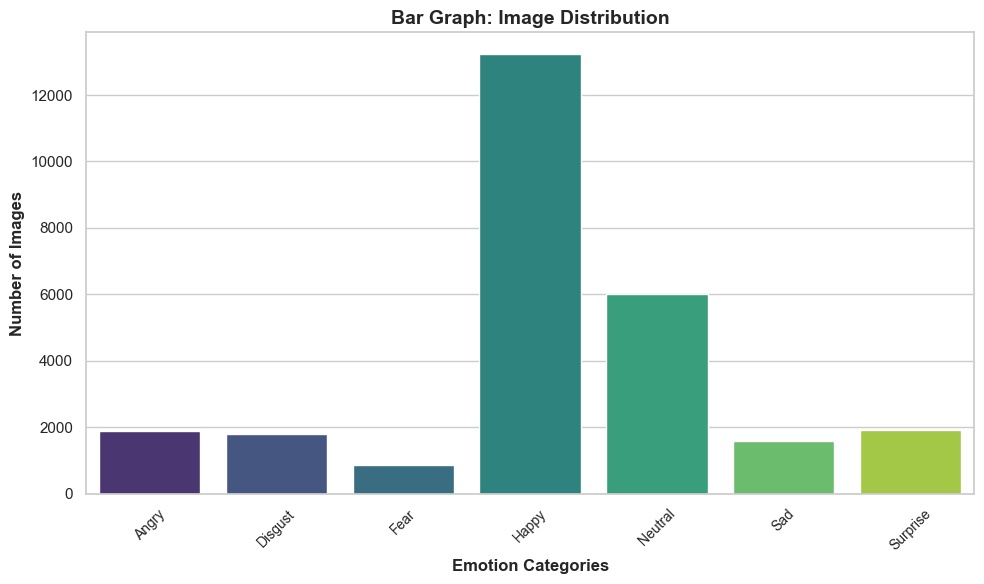

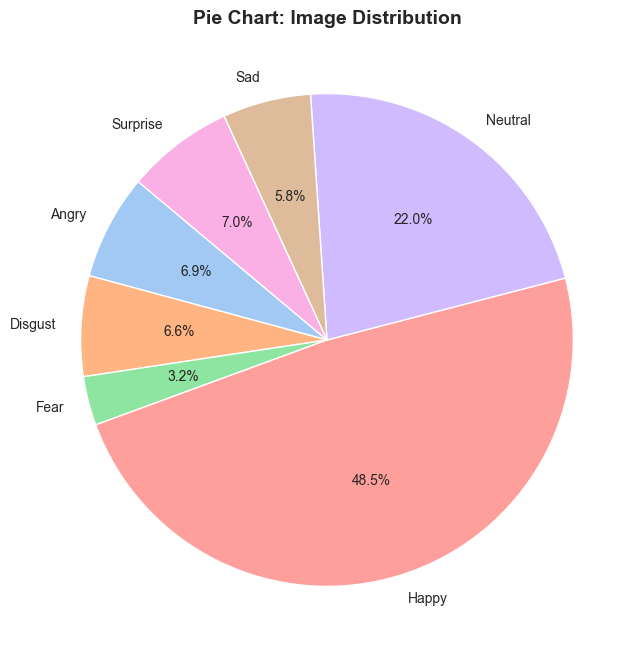

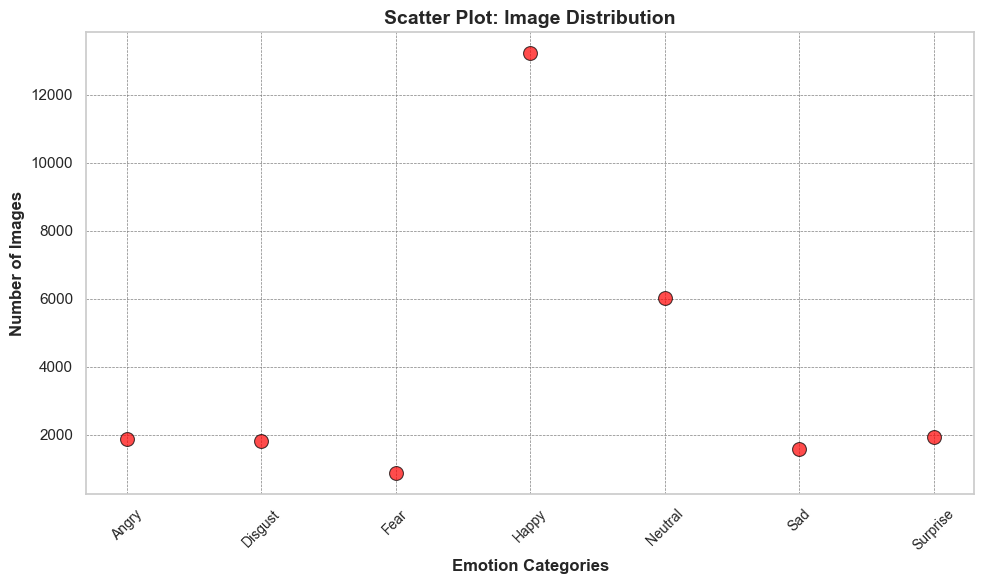

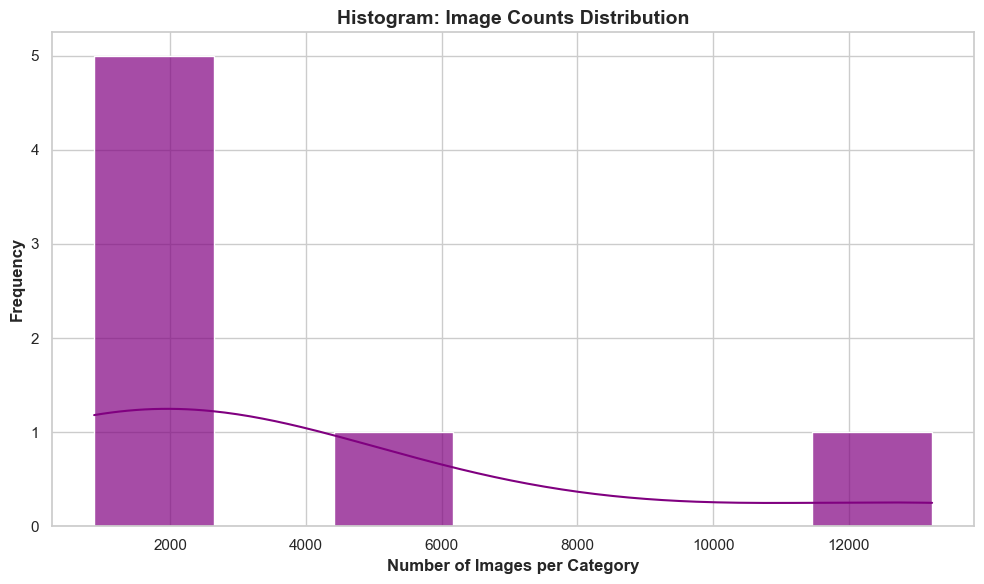

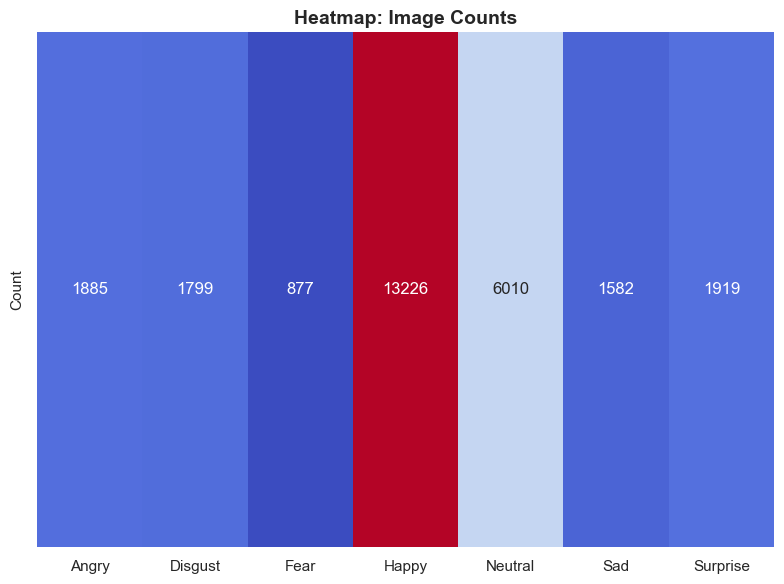

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Path to the train folder
train_folder = "C:/Users/CG Lab/Desktop/project/project1/images/train"

# Function to analyze the folder structure
def analyze_folders(folder_path):
    categories = {}
    subfolders = os.listdir(folder_path)
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            num_images = len([file for file in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, file))])
            categories[subfolder] = num_images
    return categories

# Generate enhanced graphs
def create_attractive_graphs(category_counts):
    # Data Preparation
    labels = list(category_counts.keys())
    counts = list(category_counts.values())
    df = pd.DataFrame({'Category': labels, 'Count': counts})
    
    # Set style and color palette
    sns.set_theme(style="whitegrid", palette="pastel")
    
    # 1. Bar Graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='Count', data=df, palette="viridis")
    plt.xlabel("Emotion Categories", fontsize=12, weight='bold')
    plt.ylabel("Number of Images", fontsize=12, weight='bold')
    plt.title("Bar Graph: Image Distribution", fontsize=14, weight='bold')
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.savefig("enhanced_bar_graph.png", dpi=300)
    plt.show()

    # 2. Pie Chart
    plt.figure(figsize=(8, 8))
    colors = sns.color_palette("pastel")
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title("Pie Chart: Image Distribution", fontsize=14, weight='bold')
    plt.savefig("enhanced_pie_chart.png", dpi=300)
    plt.show()

    # 3. Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Category', y='Count', data=df, s=100, color="red", alpha=0.7, edgecolor="black")
    plt.xlabel("Emotion Categories", fontsize=12, weight='bold')
    plt.ylabel("Number of Images", fontsize=12, weight='bold')
    plt.title("Scatter Plot: Image Distribution", fontsize=14, weight='bold')
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig("enhanced_scatter_plot.png", dpi=300)
    plt.show()

    # 4. Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(counts, bins=len(counts), kde=True, color="purple", alpha=0.7)
    plt.xlabel("Number of Images per Category", fontsize=12, weight='bold')
    plt.ylabel("Frequency", fontsize=12, weight='bold')
    plt.title("Histogram: Image Counts Distribution", fontsize=14, weight='bold')
    plt.tight_layout()
    plt.savefig("enhanced_histogram.png", dpi=300)
    plt.show()

    # 5. Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap([counts], annot=True, fmt="d", cmap="coolwarm", xticklabels=labels, yticklabels=["Count"], cbar=False)
    plt.title("Heatmap: Image Counts", fontsize=14, weight='bold')
    plt.tight_layout()
    plt.savefig("enhanced_heatmap.png", dpi=300)
    plt.show()

# Main Execution
category_counts = analyze_folders(train_folder)
print("Category Counts:", category_counts)
create_attractive_graphs(category_counts)


Class Names: ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
True Labels Count: 27298
Predicted Labels Count: 27298


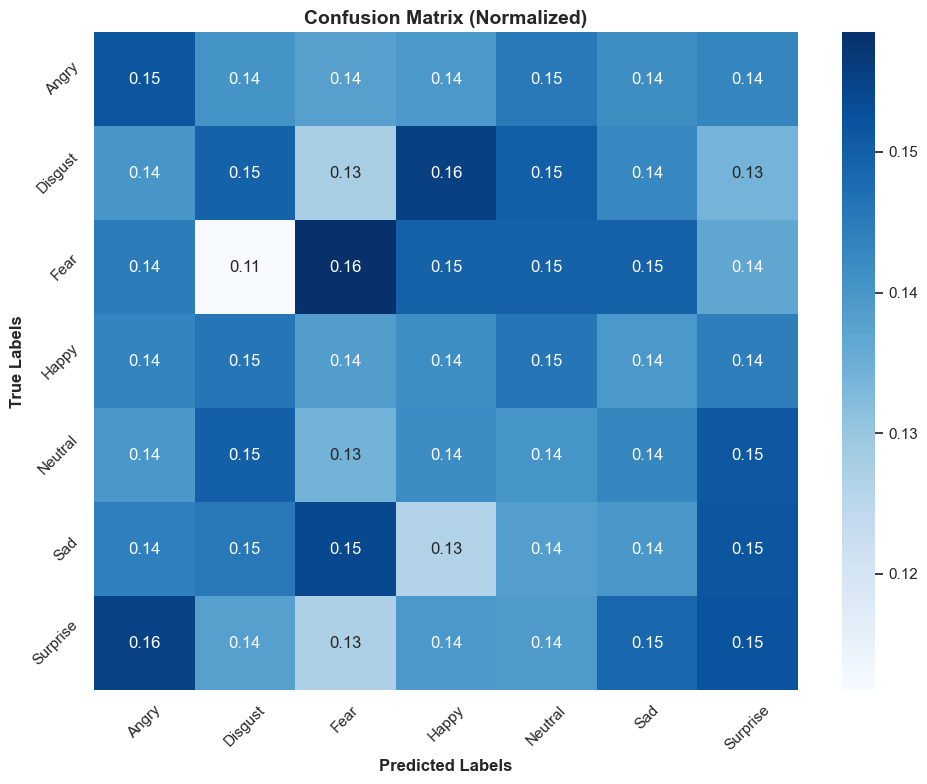

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Path to the train folder
train_folder = "C:/Users/CG Lab/Desktop/project/project1/images/train"

# Function to create true labels from the folder structure
def create_labels_from_folders(folder_path):
    class_names = sorted(os.listdir(folder_path))
    true_labels = []
    image_paths = []
    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            images = os.listdir(class_folder)
            true_labels.extend([idx] * len(images))
            image_paths.extend([os.path.join(class_folder, img) for img in images])
    return true_labels, image_paths, class_names

# Function to simulate predicted labels
# Replace this with your model's predictions
def simulate_predictions(true_labels):
    # Simulating predictions with random noise for demonstration
    np.random.seed(42)
    predicted_labels = np.random.choice(np.unique(true_labels), size=len(true_labels))
    return predicted_labels

# Plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, class_names, save_path="confusion_matrix.png"):
    cm = confusion_matrix(true_labels, predicted_labels, labels=range(len(class_names)))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix (Normalized)", fontsize=14, weight='bold')
    plt.xlabel("Predicted Labels", fontsize=12, weight='bold')
    plt.ylabel("True Labels", fontsize=12, weight='bold')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Main script
if __name__ == "__main__":
    # Get true labels and class names from the train folder
    true_labels, image_paths, class_names = create_labels_from_folders(train_folder)
    
    # Simulate predictions (Replace this with your actual predictions)
    predicted_labels = simulate_predictions(true_labels)
    
    # Display class names and counts
    print(f"Class Names: {class_names}")
    print(f"True Labels Count: {len(true_labels)}")
    print(f"Predicted Labels Count: {len(predicted_labels)}")
    
    # Plot and save confusion matrix
    plot_confusion_matrix(true_labels, predicted_labels, class_names)


Class Names: ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
True Labels Count: 27303
Predicted Labels Count: 27303


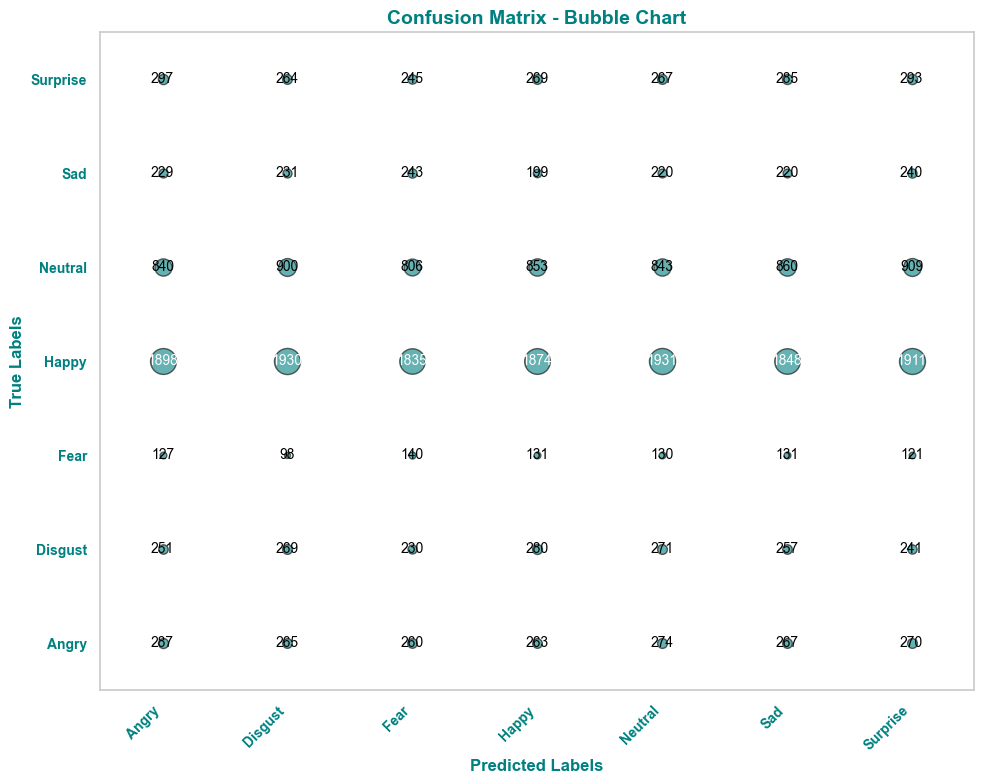

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Path to the test folder
test_folder = "C:/Users/CG Lab/Desktop/project/project1/images/test"

# Function to create true labels from the folder structure
def create_labels_from_folders(folder_path):
    class_names = sorted(os.listdir(folder_path))
    true_labels = []
    image_paths = []
    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            images = os.listdir(class_folder)
            true_labels.extend([idx] * len(images))
            image_paths.extend([os.path.join(class_folder, img) for img in images])
    return true_labels, image_paths, class_names

# Function to simulate predicted labels
# Replace this with your model's predictions
def simulate_predictions(true_labels):
    # Simulating predictions with random noise for demonstration
    np.random.seed(42)
    predicted_labels = np.random.choice(np.unique(true_labels), size=len(true_labels))
    return predicted_labels

# Plot bubble chart for confusion matrix
def plot_bubble_confusion_matrix(true_labels, predicted_labels, class_names, save_path="bubble_confusion_matrix.png"):
    cm = confusion_matrix(true_labels, predicted_labels, labels=range(len(class_names)))

    # Create bubble chart
    fig, ax = plt.subplots(figsize=(10, 8))
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            bubble_size = cm[i, j] / cm.sum() * 5000  # Scale the bubble size
            ax.scatter(j, i, s=bubble_size, alpha=0.6, color="teal", edgecolor="black")
            ax.text(j, i, cm[i, j], ha='center', va='center', fontsize=10, color="white" if cm[i, j] > cm.max()/2 else "black")

    # Format the plot
    ax.set_xticks(range(len(class_names)))
    ax.set_yticks(range(len(class_names)))
    ax.set_xticklabels(class_names, rotation=45, ha="right", fontsize=10, weight="bold", color="teal")
    ax.set_yticklabels(class_names, fontsize=10, weight="bold", color="teal")
    ax.set_xlabel("Predicted Labels", fontsize=12, weight="bold", color="teal")
    ax.set_ylabel("True Labels", fontsize=12, weight="bold", color="teal")
    ax.set_title("Confusion Matrix - Bubble Chart", fontsize=14, weight="bold", color="teal")
    ax.set_xlim(-0.5, len(class_names) - 0.5)
    ax.set_ylim(-0.5, len(class_names) - 0.5)
    ax.grid(False)

    # Save and display the plot
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Main script
if __name__ == "__main__":
    # Get true labels and class names from the test folder
    true_labels, image_paths, class_names = create_labels_from_folders(test_folder)
    
    # Simulate predictions (Replace this with your actual predictions)
    predicted_labels = simulate_predictions(true_labels)
    
    # Display class names and counts
    print(f"Class Names: {class_names}")
    print(f"True Labels Count: {len(true_labels)}")
    print(f"Predicted Labels Count: {len(predicted_labels)}")
    
    # Plot and save bubble confusion matrix
    plot_bubble_confusion_matrix(true_labels, predicted_labels, class_names)


Class Distribution: {'Angry': 1886, 'Disgust': 1799, 'Fear': 878, 'Happy': 13227, 'Neutral': 6011, 'Sad': 1582, 'Surprise': 1920}


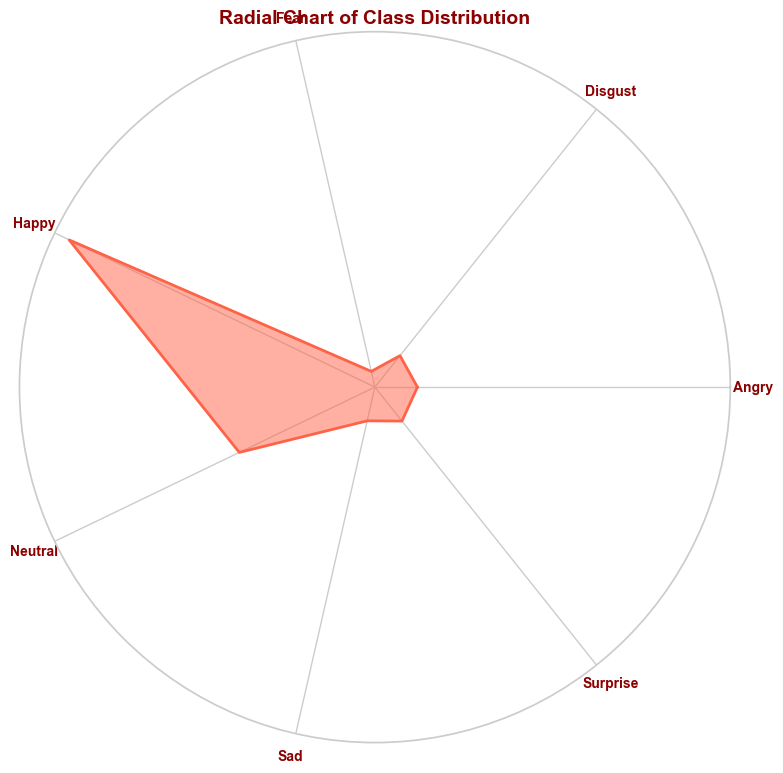

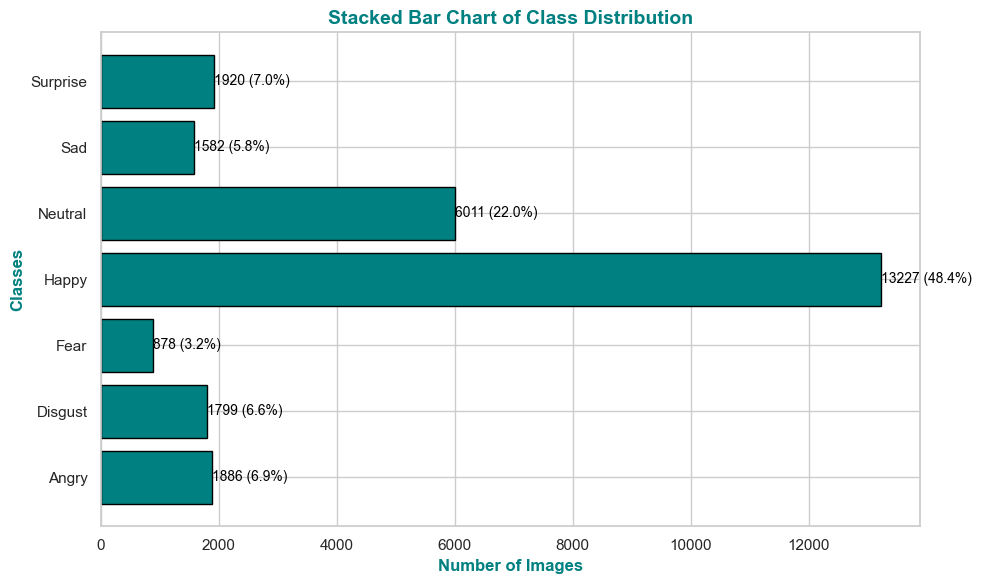

C:\Users\CG Lab\AppData\Local\Temp\ipykernel_24524\4220530146.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=all_labels, y=all_data, palette="husl")


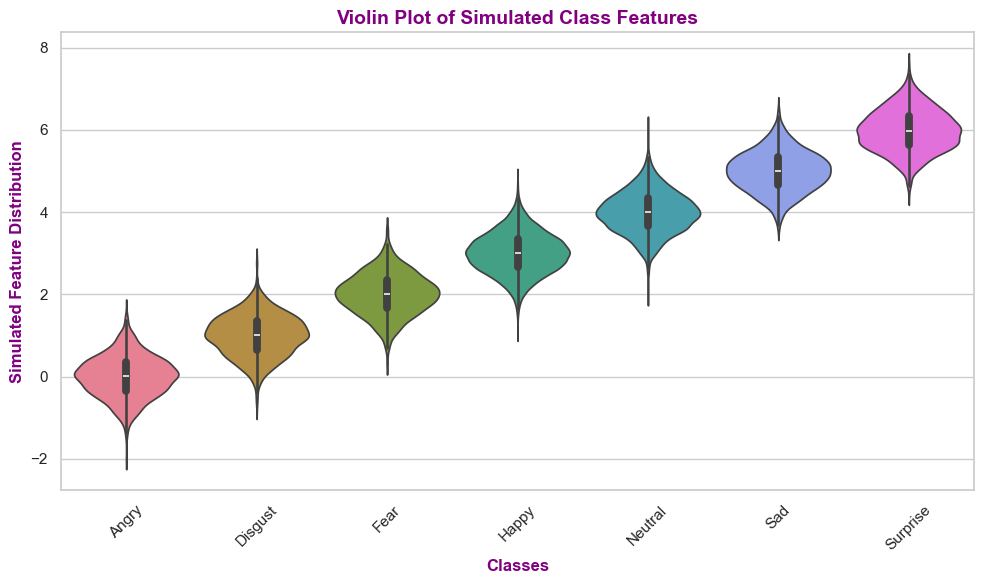

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Path to the test folder
test_folder = "C:/Users/CG Lab/Desktop/project/project1/images/test"

# Function to create labels and counts from folder structure
def get_class_distribution(folder_path):
    class_names = sorted(os.listdir(folder_path))
    class_counts = {}
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            image_count = len(os.listdir(class_folder))
            class_counts[class_name] = image_count
    return class_counts

# Function to create a radial bar chart
def plot_radial_chart(class_counts, save_path="radial_chart.png"):
    labels = list(class_counts.keys())
    values = list(class_counts.values())
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    
    # Close the circle
    values += values[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='tomato', alpha=0.5)
    ax.plot(angles, values, color='tomato', linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10, weight="bold", color="darkred")
    ax.set_title("Radial Chart of Class Distribution", fontsize=14, weight="bold", color="darkred")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Function to create a stacked bar chart
def plot_stacked_bar_chart(class_counts, save_path="stacked_bar_chart.png"):
    labels = list(class_counts.keys())
    values = list(class_counts.values())
    total = sum(values)
    
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='teal', edgecolor="black")
    for i, v in enumerate(values):
        plt.text(v + 2, i, f"{v} ({(v/total)*100:.1f}%)", color='black', va='center', fontsize=10)
    plt.xlabel("Number of Images", fontsize=12, weight="bold", color="teal")
    plt.ylabel("Classes", fontsize=12, weight="bold", color="teal")
    plt.title("Stacked Bar Chart of Class Distribution", fontsize=14, weight="bold", color="teal")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Function to create a violin plot for simulated data
def plot_violin_chart(class_counts, save_path="violin_chart.png"):
    labels = list(class_counts.keys())
    # Simulate random feature distributions per class
    data = {label: np.random.normal(loc=idx, scale=0.5, size=class_counts[label]) for idx, label in enumerate(labels)}
    
    all_data = []
    all_labels = []
    for label, values in data.items():
        all_data.extend(values)
        all_labels.extend([label] * len(values))
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=all_labels, y=all_data, palette="husl")
    plt.xlabel("Classes", fontsize=12, weight="bold", color="purple")
    plt.ylabel("Simulated Feature Distribution", fontsize=12, weight="bold", color="purple")
    plt.title("Violin Plot of Simulated Class Features", fontsize=14, weight="bold", color="purple")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Main script
if __name__ == "__main__":
    # Get class distribution from the test folder
    class_counts = get_class_distribution(test_folder)
    
    # Display the class counts
    print(f"Class Distribution: {class_counts}")
    
    # Plot and save the graphs
    plot_radial_chart(class_counts)
    plot_stacked_bar_chart(class_counts)
    plot_violin_chart(class_counts)


Class Distribution: {'Angry': 1886, 'Disgust': 1799, 'Fear': 878, 'Happy': 13227, 'Neutral': 6011, 'Sad': 1582, 'Surprise': 1920}


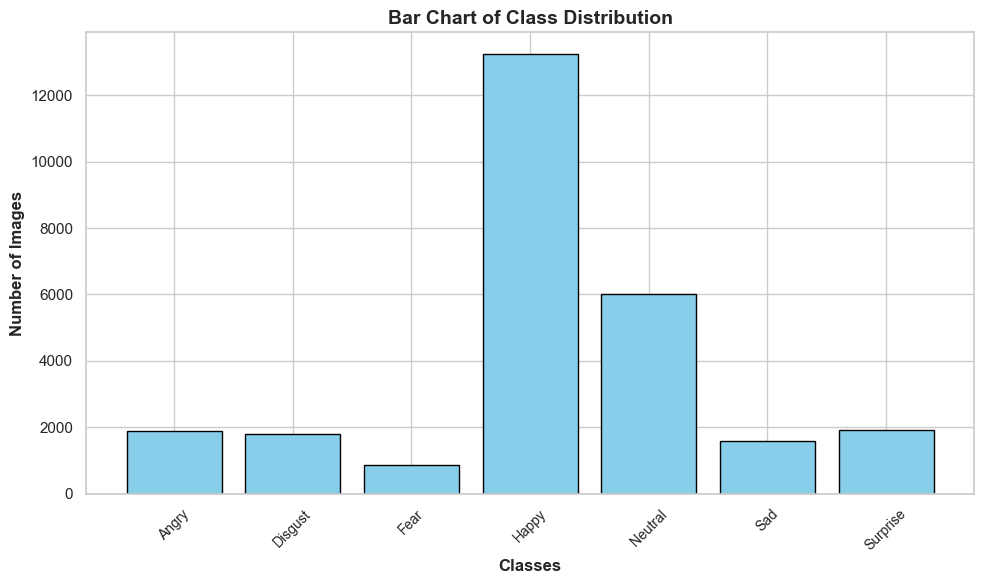

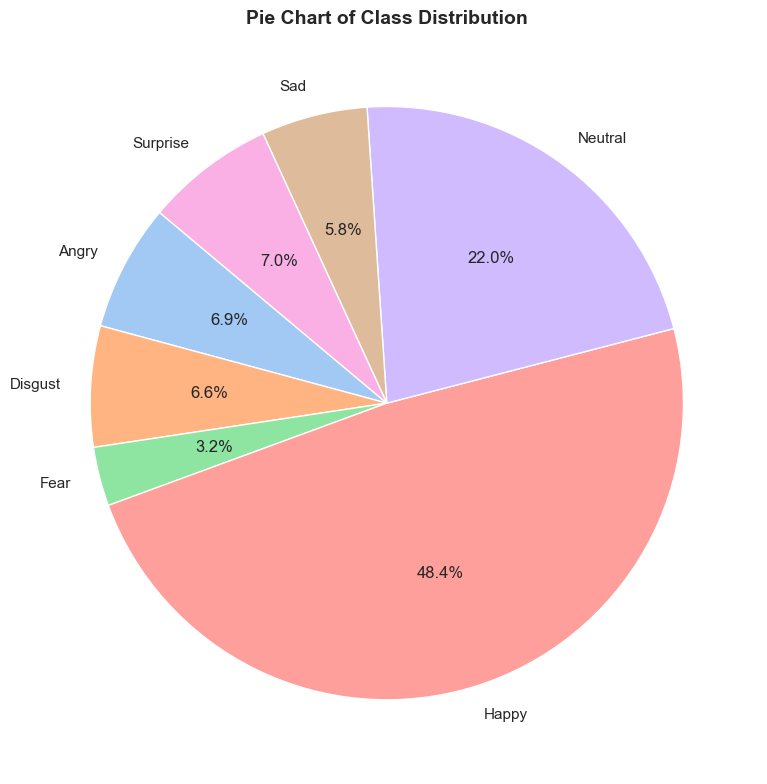

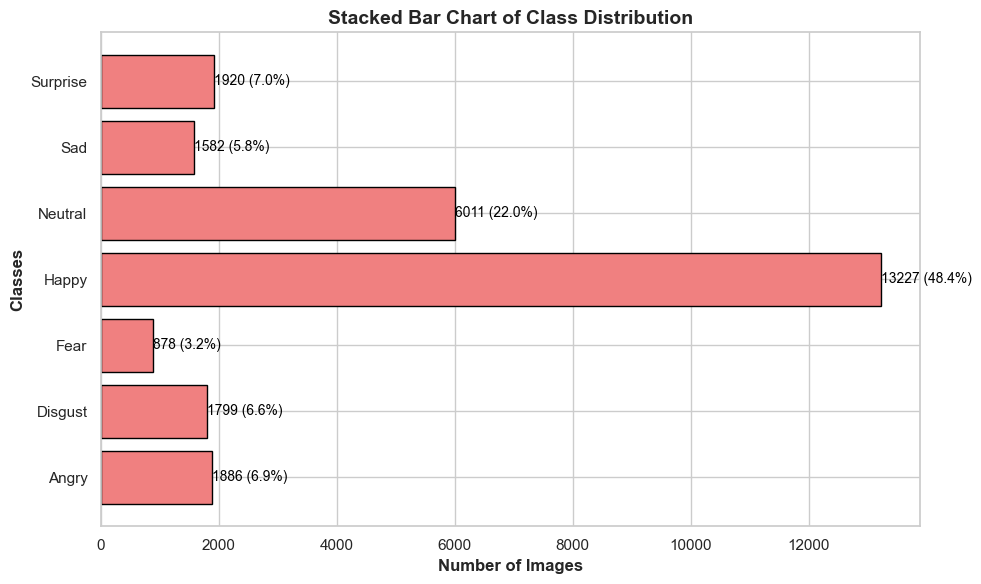

C:\Users\CG Lab\AppData\Local\Temp\ipykernel_24524\3559476627.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=all_labels, y=all_data, palette="husl")


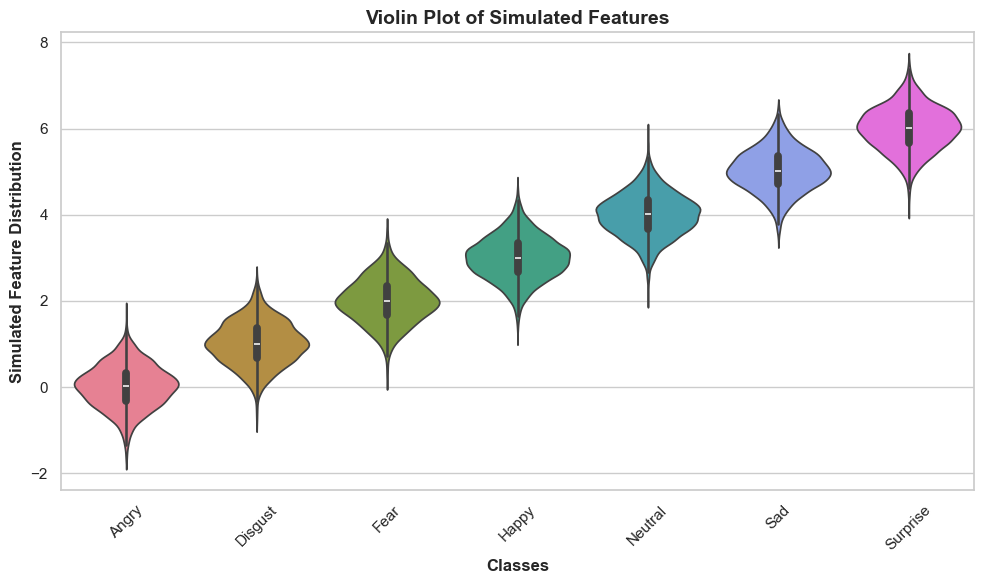

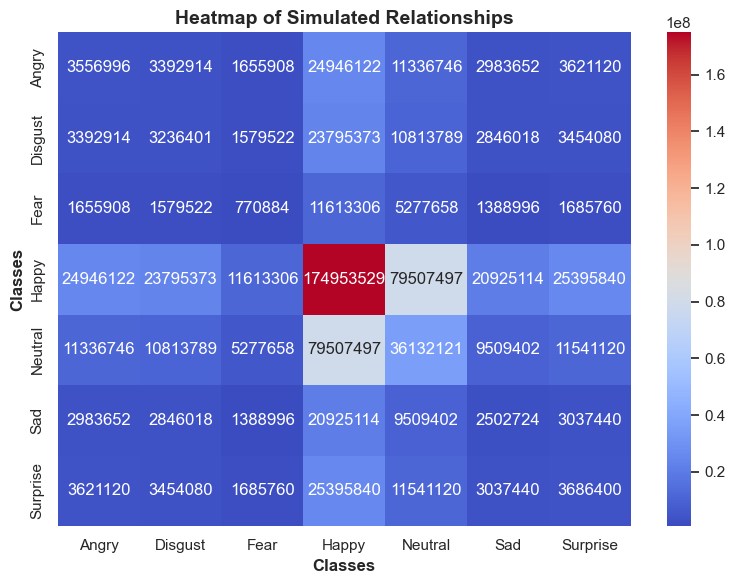

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the dataset folder
dataset_folder = "C:/Users/CG Lab/Desktop/project/project1/images/test"

# Function to get class distribution from the folder structure
def get_class_distribution(folder_path):
    class_names = sorted(os.listdir(folder_path))
    class_counts = {}
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            image_count = len(os.listdir(class_folder))
            class_counts[class_name] = image_count
    return class_counts

# Function to create a bar chart
def plot_bar_chart(class_counts, save_path="bar_chart.png"):
    labels = list(class_counts.keys())
    values = list(class_counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color="skyblue", edgecolor="black")
    plt.xlabel("Classes", fontsize=12, weight="bold")
    plt.ylabel("Number of Images", fontsize=12, weight="bold")
    plt.title("Bar Chart of Class Distribution", fontsize=14, weight="bold")
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Function to create a pie chart
def plot_pie_chart(class_counts, save_path="pie_chart.png"):
    labels = list(class_counts.keys())
    values = list(class_counts.values())
    colors = sns.color_palette("pastel")[0:len(labels)]
    
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
    plt.title("Pie Chart of Class Distribution", fontsize=14, weight="bold")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Function to create a stacked bar chart
def plot_stacked_bar_chart(class_counts, save_path="stacked_bar_chart.png"):
    labels = list(class_counts.keys())
    values = list(class_counts.values())
    total = sum(values)
    
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='lightcoral', edgecolor="black")
    for i, v in enumerate(values):
        plt.text(v + 2, i, f"{v} ({(v/total)*100:.1f}%)", color='black', va='center', fontsize=10)
    plt.xlabel("Number of Images", fontsize=12, weight="bold")
    plt.ylabel("Classes", fontsize=12, weight="bold")
    plt.title("Stacked Bar Chart of Class Distribution", fontsize=14, weight="bold")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Function to create a violin plot for simulated feature distribution
def plot_violin_chart(class_counts, save_path="violin_chart.png"):
    labels = list(class_counts.keys())
    # Simulate random feature distributions per class
    data = {label: np.random.normal(loc=idx, scale=0.5, size=class_counts[label]) for idx, label in enumerate(labels)}
    
    all_data = []
    all_labels = []
    for label, values in data.items():
        all_data.extend(values)
        all_labels.extend([label] * len(values))
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=all_labels, y=all_data, palette="husl")
    plt.xlabel("Classes", fontsize=12, weight="bold")
    plt.ylabel("Simulated Feature Distribution", fontsize=12, weight="bold")
    plt.title("Violin Plot of Simulated Features", fontsize=14, weight="bold")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Function to create a heatmap of class counts (cross-distribution simulation)
def plot_heatmap(class_counts, save_path="heatmap.png"):
    labels = list(class_counts.keys())
    values = list(class_counts.values())
    matrix = np.outer(values, values)  # Simulate relationships between classes
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
    plt.title("Heatmap of Simulated Relationships", fontsize=14, weight="bold")
    plt.xlabel("Classes", fontsize=12, weight="bold")
    plt.ylabel("Classes", fontsize=12, weight="bold")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Main script
if __name__ == "__main__":
    # Get class distribution from the dataset folder
    class_counts = get_class_distribution(dataset_folder)
    
    # Display the class distribution
    print(f"Class Distribution: {class_counts}")
    
    # Generate graphs
    plot_bar_chart(class_counts)
    plot_pie_chart(class_counts)
    plot_stacked_bar_chart(class_counts)
    plot_violin_chart(class_counts)
    plot_heatmap(class_counts)
